In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('BTC-USD.csv')

# With MA

In [ ]:
# Calculate the 7-day simple moving average
df['SMA_7'] = df['Close'].rolling(window=7).mean()

# Plot the closing prices and the moving average
plt.figure(figsize=(15, 7))
plt.plot(df['Date'], df['Close'], label='Closing Price', alpha=0.5)
plt.plot(df['Date'], df['SMA_7'], label='7-day SMA', color='red')
plt.title('Bitcoin Closing Prices with 7-day Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(df['Date'][::365], rotation=45)  # Sample every 365th date for clearer x-axis
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the derivative for the smoothed data
df['SMA_derivative'] = df['SMA_7'].diff().fillna(0)

# Find local minima and maxima for the smoothed data
conditions = [
    (df['SMA_derivative'] < 0) & (df['SMA_derivative'].shift(-1) > 0), # Minima condition
    (df['SMA_derivative'] > 0) & (df['SMA_derivative'].shift(-1) < 0)  # Maxima condition
]

values = [-1, 1]

# Applying the conditions and assigning values, the default is 0 for other cases
df['SMA_min_max'] = np.select(conditions, values, default=0)

# Plot the data with detected minima and maxima
plt.figure(figsize=(15, 7))
plt.plot(df['Date'], df['Close'], label='Closing Price', alpha=0.5)
plt.plot(df['Date'], df['SMA_7'], label='7-day SMA', color='red')
plt.scatter(df['Date'][df['SMA_min_max'] == -1], df['SMA_7'][df['SMA_min_max'] == -1], color='green', label='SMA Minima')
plt.scatter(df['Date'][df['SMA_min_max'] == 1], df['SMA_7'][df['SMA_min_max'] == 1], color='blue', label='SMA Maxima')
plt.title('Bitcoin Closing Prices with Minima and Maxima on 7-day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(df['Date'][::365], rotation=45)  # Sample every 365th date for clearer x-axis
plt.legend()

plt.show()


# with a window and magnitude of change for Min_Max

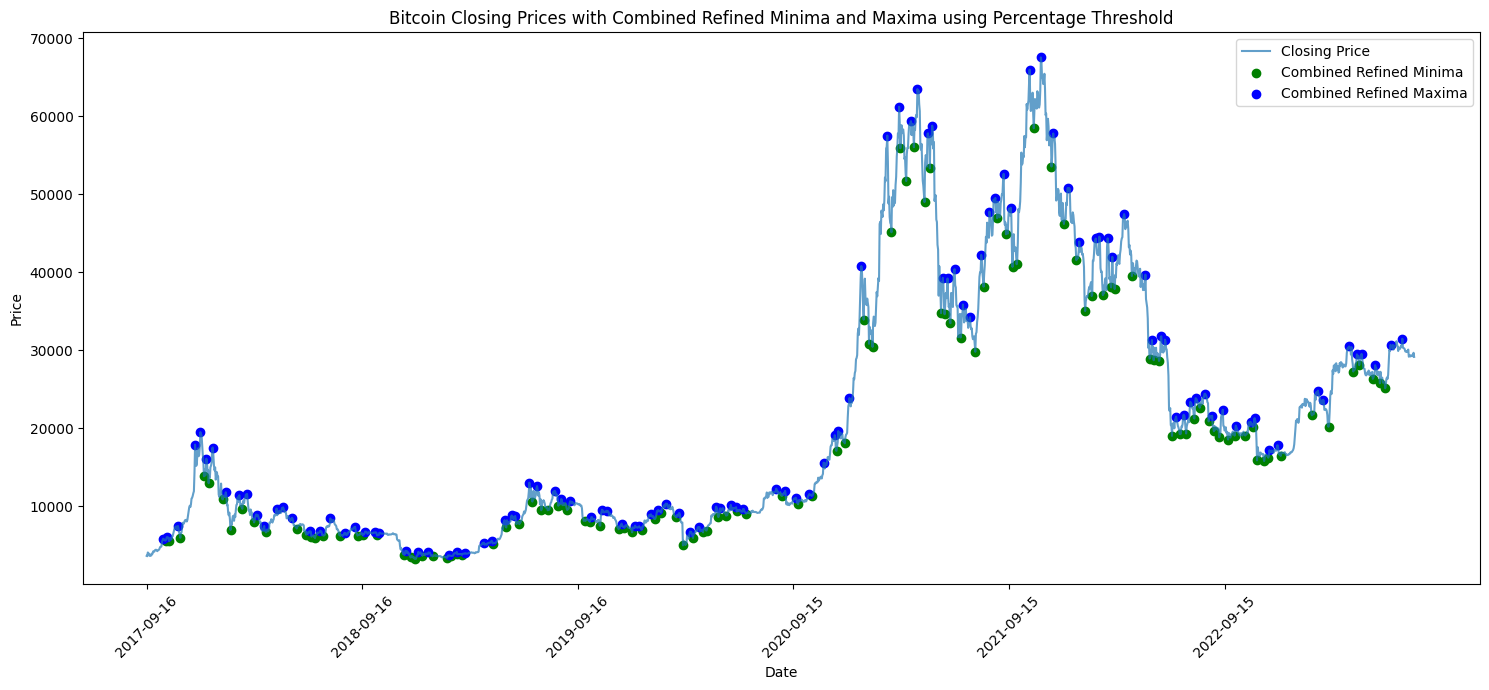

In [18]:
# Define the window size and threshold percentage
window_size = 10
threshold_percentage = 5  # 5% change

# Calculate the threshold_value as a percentage of the closing price
threshold_value = df['Close'] * threshold_percentage / 100

# Initialize a column for combined refined minima and maxima with percentage threshold
df['combined_refined_min_max_percentage'] = 0

# Loop through the dataframe and apply the combined condition with percentage threshold
for i in range(window_size, len(df) - window_size):
    current_window = df['Close'].iloc[i - window_size//2 : i + window_size//2 + 1]
    current_point = df['Close'].iloc[i]
    
    # Check if current point is minima or maxima in the window
    if current_point == min(current_window) and abs(current_point - max(current_window)) > threshold_value.iloc[i]:
        df.at[i, 'combined_refined_min_max_percentage'] = -1
    elif current_point == max(current_window) and abs(current_point - min(current_window)) > threshold_value.iloc[i]:
        df.at[i, 'combined_refined_min_max_percentage'] = 1

# Plot the data with detected combined refined minima and maxima using percentage threshold
plt.figure(figsize=(15, 7))
plt.plot(df['Date'], df['Close'], label='Closing Price', alpha=0.7)
plt.scatter(df['Date'][df['combined_refined_min_max_percentage'] == -1], df['Close'][df['combined_refined_min_max_percentage'] == -1], color='green', label='Combined Refined Minima')
plt.scatter(df['Date'][df['combined_refined_min_max_percentage'] == 1], df['Close'][df['combined_refined_min_max_percentage'] == 1], color='blue', label='Combined Refined Maxima')
plt.title('Bitcoin Closing Prices with Combined Refined Minima and Maxima using Percentage Threshold')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(df['Date'][::365], rotation=45)  # Sample every 365th date for clearer x-axis
plt.legend()
plt.tight_layout()
plt.show()

